In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('no-outlier.csv')
data

,Unnamed: 0,Acc_X,Acc_Y,Acc_Z,Class
0,0,2.660984,-9.653030,0.470237,1
1,1,2.223091,-9.432167,2.223091,1
2,2,2.098372,-9.481953,0.926070,1
3,3,2.716461,-9.739352,0.912008,1
4,4,2.288388,-9.371498,0.910390,1
...,...,...,...,...,...
155402,155402,8.701128,4.238336,-0.194529,21
155403,155403,8.680778,4.261679,-0.159214,21
155404,155404,8.756194,4.168306,-0.144251,21
155405,155405,8.662222,4.219781,-0.183755,21


In [3]:
label = LabelEncoder()
data['label'] = label.fit_transform(data['Class'])
data

,Unnamed: 0,Acc_X,Acc_Y,Acc_Z,Class,label
0,0,2.660984,-9.653030,0.470237,1,0
1,1,2.223091,-9.432167,2.223091,1,0
2,2,2.098372,-9.481953,0.926070,1,0
3,3,2.716461,-9.739352,0.912008,1,0
4,4,2.288388,-9.371498,0.910390,1,0
...,...,...,...,...,...,...
155402,155402,8.701128,4.238336,-0.194529,21,20
155403,155403,8.680778,4.261679,-0.159214,21,20
155404,155404,8.756194,4.168306,-0.144251,21,20
155405,155405,8.662222,4.219781,-0.183755,21,20


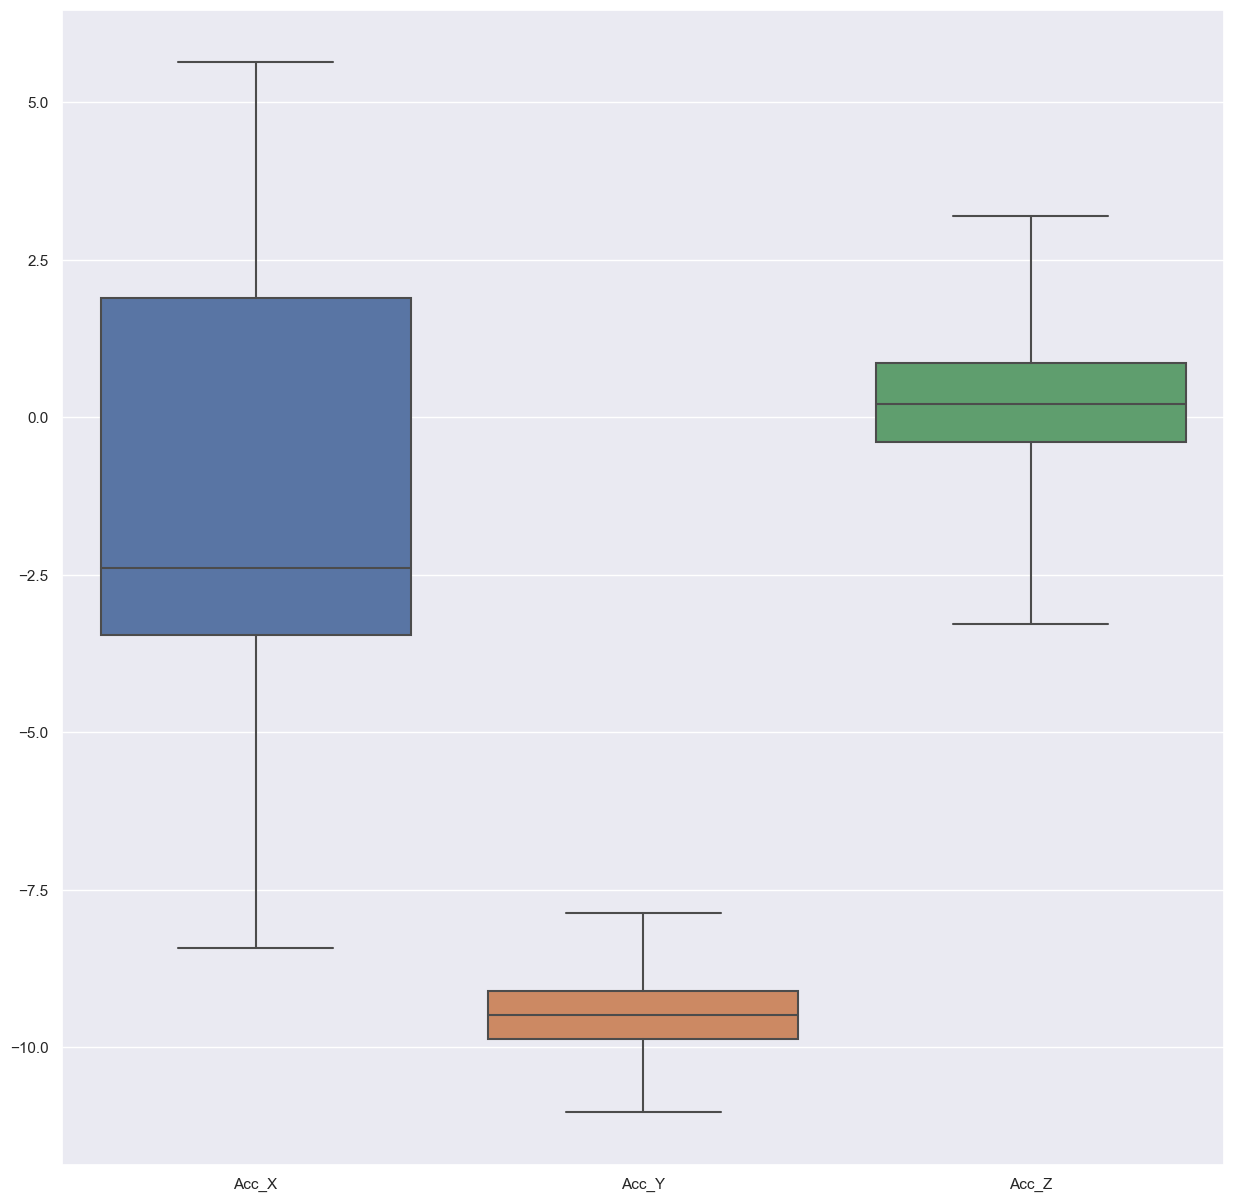

In [4]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig=sns.boxplot(data=data.iloc[0:8000,1:4],whis=[0, 100])
count=0

In [5]:
dfn = data.drop('Unnamed: 0', axis=1)  
dfn

,Acc_X,Acc_Y,Acc_Z,Class,label
0,2.660984,-9.653030,0.470237,1,0
1,2.223091,-9.432167,2.223091,1,0
2,2.098372,-9.481953,0.926070,1,0
3,2.716461,-9.739352,0.912008,1,0
4,2.288388,-9.371498,0.910390,1,0
...,...,...,...,...,...
155402,8.701128,4.238336,-0.194529,21,20
155403,8.680778,4.261679,-0.159214,21,20
155404,8.756194,4.168306,-0.144251,21,20
155405,8.662222,4.219781,-0.183755,21,20


In [6]:
label.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

In [7]:
X = dfn[['Acc_X', 'Acc_Y', 'Acc_Z']]
y = dfn['label']

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['Acc_X', 'Acc_Y', 'Acc_Z'])
scaled_X['mag'] = np.sqrt(scaled_X['Acc_X'] ** 2 + scaled_X['Acc_Y'] ** 2 + scaled_X['Acc_Z'] ** 2)
scaled_X['label'] = y.values

scaled_X.head()

,Acc_X,Acc_Y,Acc_Z,mag,label
0,0.985481,-0.807007,-0.491449,1.365267,0
1,0.865844,-0.763546,-0.059973,1.155978,0
2,0.831769,-0.773343,-0.379243,1.197382,0
3,1.000638,-0.823993,-0.382704,1.351556,0
4,0.883684,-0.751608,-0.383103,1.221712,0


In [9]:
scaled_X = scaled_X.drop(['Acc_X', 'Acc_Y', 'Acc_Z'], axis=1)

scaled_X

,mag,label
0,1.365267,0
1,1.155978,0
2,1.197382,0
3,1.351556,0
4,1.221712,0
...,...,...
155402,3.329777,20
155403,3.326341,20
155404,3.331364,20
155405,3.318731,20


In [10]:
import scipy.stats as stats


In [11]:
Fs = 20
frame_size = Fs * 20
hop_size = Fs * 1
frames = []
labels = []

for i in range(0, len(scaled_X) - frame_size, hop_size):
    x = scaled_X['mag'].values[i: i + frame_size]
    label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]
    frames.append([x])
    labels.append(label)

C:\Users\Acer Nitro 5\AppData\Local\Temp\ipykernel_10688\1805871090.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]


In [12]:
frames = np.asarray(frames).reshape(-1, frame_size)
labels = np.asarray(labels)

In [13]:
print("RESHAPE SHAPE: ",frames.shape)
print("LABELS: ",labels.shape)
print("LABELS: ",labels[0])
print("LABELS: ",labels[487])


RESHAPE SHAPE:  (7751, 400)
LABELS:  (7751,)
LABELS:  0
LABELS:  1


In [14]:
x=frames
y=labels

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123, stratify=y)


In [16]:
training_files=[x_train, y_train]
subject_files=[x_test, y_test]

In [17]:
class ProgressMeter(object):
    def __init__(self, num_batches, *meters, prefix=""):
        self.batch_fmtstr = self._get_batch_fmtstr(num_batches)
        self.meters = meters
        self.prefix = prefix

    def print(self, batch):
        entries = [self.prefix + self.batch_fmtstr.format(batch)]
        entries += [str(meter) for meter in self.meters]
        print('\t'.join(entries))

    def _get_batch_fmtstr(self, num_batches):
        num_digits = len(str(num_batches // 1))
        fmt = '{:' + str(num_digits) + 'd}'
        return '[' + fmt + '/' + fmt.format(num_batches) + ']'

In [18]:
import torch
from torch.utils.data import Dataset


class LoadDataset_from_numpy(Dataset):
    def __init__(self, np_data):
        super(LoadDataset_from_numpy, self).__init__()
        X_train = np_data[0]
        y_train = np_data[1]
        self.len = X_train.shape[0]
        self.x_data = torch.from_numpy(X_train).float()
        self.y_data = torch.from_numpy(y_train).long()
        self.x_data = self.x_data.view(self.x_data.size()[0], 1, self.x_data.size()[1])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len


def data_generator_np(training_files, subject_files, batch_size):
    train_dataset = LoadDataset_from_numpy(training_files)
    test_dataset = LoadDataset_from_numpy(subject_files)

    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=batch_size,
                                               shuffle=True,
                                               drop_last=True,
                                               num_workers=0)

    test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                              batch_size=batch_size,
                                              shuffle=False,
                                              drop_last=True,
                                              num_workers=0)

    return train_loader, test_loader

In [19]:
train_loader, test_loader = data_generator_np(training_files, subject_files, 64)


In [20]:
import torch.nn as nn
from torch.nn import functional as f

"""
2.1  Signal Segments Representation

Signal Segment Definition: class SignalSegmentDefinition(nn.Module)
Signal Segment Representation: class SignalSegmentRepresentation(nn.Module)

2.2 Relationship Learning

2.2.1 Global Node Attention: class GNA(nn.Module):

***
(1) Signal Segment Definition -> (2) Signal Segment Representation -> (3) Global Node Attention
"""


class SignalSegmentDefinition(nn.Module):
    """
   (1) Signal Segment Definition

    input size: B, 1, 1, L
    output size: B, K, 1, D
    """
    def __init__(self, kernel_size, stride):
        super().__init__()
        self.kernel_size = kernel_size
        self.stride = stride

    def forward(self, x):
        b = f.unfold(x, kernel_size=self.kernel_size, stride=self.stride)  # overlapping sliding window
        b = b.permute(0, 2, 1)
        b = b.unsqueeze(-2)
        return b


class SignalSegmentRepresentation(nn.Module):
    """
    (2) Signal Segment Representation

    input arg:
    segment_size: a single signal segment size
    overlapping_rate: sliding window overlapping rate
    segment_num: number of the signal segments

    input size:  B, 1, 1, L
    output size: B, K, 1, C
    """
    def __init__(self, segment_size, overlapping_rate, segment_num):
        super(SignalSegmentRepresentation, self).__init__()
        self.overlapping = int(segment_size - segment_size * overlapping_rate)
        self.segment = SignalSegmentDefinition((1, segment_size), self.overlapping)
        self.segment2vec = SignalSegment2Vec(30)
        self.gna = GNA(segment_num)

    def forward(self, x):
        signal_segments = []
        x = self.segment(x)
        x = x.squeeze()
        "share the SignalSegment2Vec Encoder"
        for idx in range(x.size()[1]):
            data = x[:, idx, :]
            data = data.unsqueeze(1)
            out = self.segment2vec(data)
            out = out.view(x.size()[0], 1, -1)
            signal_segments.append(out)
        signal_segments = torch.cat(signal_segments, dim=1)
        signal_segments = signal_segments .unsqueeze(2)
        "global node attention"
        signal_segments = self.gna(signal_segments).permute(0, 2, 1, 3)
        return signal_segments


class GNA(nn.Module):
    """
    (3) Global Node Attention

    input arg:
    channel: number of the signal segments

    input size: B, K, 1, C
    output size: B, K, 1, C
    """
    def __init__(self, channel, reduction=2):
        super(GNA, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Conv2d(channel, channel // reduction, 1, bias=False),
            nn.GELU(),
            nn.Conv2d(channel // reduction, channel, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x)
        y = self.fc(y)
        return x * y.expand_as(x)


class SignalSegment2Vec(nn.Module):
    """
    SignalSegment2Vec Encoder module in Signal Segment Representation

    input size:  B, K, 1, D
    output size: B, K, 1, C
    """
    def __init__(self, afr_reduced_cnn_size):
        super(SignalSegment2Vec, self).__init__()
        self.features = nn.Sequential(
            nn.Conv1d(1, 64, kernel_size=49, stride=6, bias=False, padding=int(49//2)),
            nn.BatchNorm1d(64),
            nn.GELU(),
            nn.MaxPool1d(kernel_size=7, stride=4, padding=int(7//2)),

            nn.Conv1d(64, 128, kernel_size=7, stride=1, bias=False, padding=int(7//2)),
            nn.BatchNorm1d(128),
            nn.GELU(),

            nn.Conv1d(128, 128, kernel_size=7, stride=1, bias=False, padding=int(7//2)),
            nn.BatchNorm1d(128),
            nn.GELU(),

            nn.MaxPool1d(kernel_size=3, stride=4, padding=int(3//2)),
        )

        self.inplanes = 128
        self.AFR = self._make_layer(ResBasicBlock, afr_reduced_cnn_size, 1)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv1d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm1d(planes * block.expansion),
            )
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.features(x)
        x = self.AFR(x)
        return x


"""
"Residual Squeeze-and-Excitation(SE) Block"
"""


class ResLayer(nn.Module):
    def __init__(self, channel, reduction=2):
        super(ResLayer, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.GELU(),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1)
        return x * y.expand_as(x)


class ResBasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, reduction=4):
        super(ResBasicBlock, self).__init__()
        self.conv1 = nn.Conv1d(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm1d(planes)
        self.relu = nn.GELU()
        self.conv2 = nn.Conv1d(planes, planes, 1)
        self.bn2 = nn.BatchNorm1d(planes)
        self.reslayer = ResLayer(planes, reduction)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.reslayer(out)
        if self.downsample is not None:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

In [21]:
"""
2.2 Relationship Learning

2.2.2 Graph-based Self Attention

graph attention: class Attention(nn.Module)
convolution-based multi-head attention: class Block(nn.Module)
"""


class Attention(nn.Module):
    """
    Graph Attention (see Eq.4)

    input arg:
    channel: number of the signal segments
    input size:  B, M, K, C
    output size: B, M, K, C
    """
    def __init__(self, channel, reduction=2):
        super().__init__()
        self.attn = nn.Sequential(
            nn.AdaptiveAvgPool2d((None, 1)),
            nn.Conv2d(channel, channel // reduction, 1, bias=False),
            nn.GELU(),
            nn.Conv2d(channel // reduction, channel, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        B, M, K, _ = x.size()
        adj = self.pearson(x)  # adjacency matrix
        x_ = self._prepare_attentional_mechanism_input(x)
        e = self.attn(x_)
        e = e.permute(0, 2, 1, 3).contiguous()
        e = e.view(B, M, K, K)
        zero_vec_adj = -9e15 * torch.ones_like(adj)
        attention = torch.where(adj > 0, e, zero_vec_adj)
        attention = f.softmax(attention, dim=-1)
        x = torch.matmul(attention, x)
        return x, adj

    def h_matmul(self, x):
        N = x.size()[-2]
        x_repeated_in_chunks = x.repeat_interleave(N, dim=-2)
        x_repeated_alternating = x.repeat(1, 1, N, 1)
        result = torch.mul(x_repeated_in_chunks, x_repeated_alternating)
        return result

    def pearson(self, x):
        "Pearson Correlation"
        centered_h = x - x.mean(dim=-1, keepdim=True)
        covariance = self.h_matmul(centered_h).sum(dim=-1, keepdim=True)
        bessel_corrected_covariance = torch.div(covariance, (x.shape[-1] - 1))
        std_h = x.std(dim=-1, keepdim=True)
        p = torch.div(bessel_corrected_covariance, (self.h_matmul(std_h)))
        p = p.view(x.size()[0], x.size()[1], x.size()[2], -1)
        return p

    def _prepare_attentional_mechanism_input(self, x):
        "concatenation operation (see Eq.4) with positional encoding"
        B, _, K, _ = x.size()
        x_repeated_in_chunks = x.repeat_interleave(K, dim=-2)
        x_repeated_alternating = x.repeat(1, 1, K, 1)

        "positional encoding"
        pos = 2 * torch.ones_like(x_repeated_alternating)
        one_vec = torch.ones_like(x_repeated_alternating)
        x_repeated_in_chunks.eq(x_repeated_alternating)
        pos = torch.where(x_repeated_in_chunks.eq(x_repeated_alternating) > 0, one_vec, pos)
        x_repeated_alternating = pos * x_repeated_alternating

        all_combinations_matrix = torch.cat([x_repeated_in_chunks, x_repeated_alternating], dim=-1)
        all_combinations_matrix = all_combinations_matrix.permute(0, 2, 1, 3)
        return all_combinations_matrix


class Block(nn.Module):
    """
    Multi-Head Attention (see Fig.2)

    input arg:
    node_size: number of the signal segments
    input_size: Q in Fig. 2
    multi_heads: number of heads

    input size: B, J, K, C    J=1 when H=1
    output size: B, M'', K, C''


    """
    def __init__(self, node_size, input_size, kernel_size, stride, multi_heads):
        super().__init__()

        expand = 1

        padding = kernel_size//2
        self.mid_channels_ = (multi_heads - kernel_size + 2 * padding) // stride + 1

        self.multi_head = nn.Sequential(
            nn.Conv2d(input_size, multi_heads, 1, bias=False),
            nn.Conv2d(multi_heads, multi_heads, 1, bias=False)
        )

        self.feature_extraction = nn.Sequential(
            nn.Conv2d(node_size, node_size, kernel_size=kernel_size, stride=stride, padding=padding,
                      groups=node_size, bias=False),
            nn.BatchNorm2d(node_size),
            nn.GELU()
        )

        self.attn = Attention(node_size * node_size)

        self.feed_forward = nn.Sequential(
            nn.Conv2d(self.mid_channels_, self.mid_channels_ * 4, 1, bias=False),
            nn.BatchNorm2d(self.mid_channels_ * 4),
            nn.GELU(),
            nn.Conv2d(self.mid_channels_ * 4, multi_heads * expand, 1, bias=False),
            nn.BatchNorm2d(multi_heads)
        )

        self.shortcut = nn.Sequential(
            nn.Conv2d(node_size, node_size, kernel_size=kernel_size, stride=stride, padding=padding, bias=False),
            nn.BatchNorm2d(node_size),
            nn.AdaptiveAvgPool2d((1, None))
        )

        self.norm = nn.BatchNorm2d(multi_heads)

    def forward(self, x):
        res = x.permute(0, 2, 1, 3)                 # B, J, K, C -> B, K, J, C
        "Dense layers"
        out = self.multi_head(x)                    # B, J, K, C -> B, M, K, C, where M is the number of heads
        out, adj = self.attn(out)
        self.adj = adj                              # for visualization
        out = f.gelu(self.norm(out))
        out = out.permute(0, 2, 1, 3)               # B, M, K, C -> B, K, M, C
        "Attention Layers"
        out = self.feature_extraction(out)          # B, K, M, C -> B, K, M', C'
        out = out.permute(0, 2, 1, 3)               # B, K, M', C' -> B, M', K, C'
        out = self.feed_forward(out)                # B, M', K, C' -> B, M'', K, C''
        shortcut = self.shortcut(res)               # B, K, J, C -> B, 1, K, C''
        shortcut = shortcut.permute(0, 2, 1, 3)
        out += shortcut                             # (B, M'', K, C'') + (B, 1, K, C'') -> (B, M'', K, C'') Broadcast
        return out

In [22]:
import torch.nn.functional as F


In [23]:
class GRAPHSENSOR(nn.Module):
    """
    GRAPHSENSOR main()

    input arg:
    segment_size: a single signal segment size
    overlapping_rate: sliding window overlapping rate
    in_channels: number of the signal segments
    class_num: class number

    input size: B, 1, L
    output size: B, class_num

    """

    def __init__(self, segment_size, overlapping_rate, in_channels, class_num):
        super(GRAPHSENSOR, self).__init__()
        self.segment_size = segment_size
        self.signal_segments = SignalSegmentRepresentation(segment_size, overlapping_rate, in_channels)
        """
        The encoder is composed of a stack of H=4 identical layers
        Multi-head number: 16 -> 32 -> 64 -> 128
        """
        self.attn = nn.Sequential(
            Block(in_channels, 1,   5, 2, 16),
            Block(in_channels, 16,  5, 2, 32),
            Block(in_channels, 32,  5, 1, 64),
            Block(in_channels, 64,  5, 1, 128),
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels * 128, 512, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.GELU()
        )
        self.avgpool = nn.AdaptiveAvgPool2d((None, 1))
        self.conv3 = nn.Sequential(
            nn.Conv2d(512, 1024, 1, bias=False),
            nn.BatchNorm2d(1024),
            nn.GELU()
        )
        self.conv4 = nn.Conv2d(1024, class_num, 1, bias=False)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.signal_segments(x)
        x = self.attn(x)
        x = self.avgpool(x)
        x = x.flatten(1).unsqueeze(-1).unsqueeze(-1)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = x.flatten(1)
        return F.log_softmax(x, dim=-1)

In [24]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [25]:
model = GRAPHSENSOR(segment_size=80, overlapping_rate=0.5, in_channels=9, class_num=21).to(device)

In [26]:
def count_parameters(model):
        return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameter')

The model has 1,561,768 trainable parameter


In [27]:
if torch.cuda.device_count() >= 1:
        print("num GPUs: ", torch.cuda.device_count())
        model = nn.DataParallel(model).to(device)

num GPUs:  1


In [28]:
best_acc = 0
best_f1 = 0

In [29]:
import os
import argparse
import time
import random
import torch.optim as optim

In [30]:
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001, amsgrad=True)
criterion = nn.CrossEntropyLoss().to(device)

In [31]:
start_time = time.time()

In [32]:
def adjust_learning_rate(optimizer, epoch, args):
    """Sets the learning rate to the initial LR decayed by 10 every 30 epochs"""
    if epoch == 10:
        for param_group in optimizer.param_groups:
            param_group['lr'] = 0.001

In [33]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self, name, fmt=':f'):
        self.name = name
        self.fmt = fmt
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

    def __str__(self):
        fmtstr = '{name} {val' + self.fmt + '} ({avg' + self.fmt + '})'
        return fmtstr.format(**self.__dict__)

In [34]:
def accuracy_(output, target):
    with torch.no_grad():
        pred = torch.argmax(output, dim=1)
        assert pred.shape[0] == len(target)
        correct = 0
        correct += torch.sum(pred == target).item()
        return correct * 100 / len(target)


def f1_(output, target):
    with torch.no_grad():
        pred = torch.argmax(output, dim=1)
        assert pred.shape[0] == len(target)
    return f1_score(pred.cpu().numpy(), target.data.cpu().numpy(), average='macro')


In [35]:
def train(train_loader, model, criterion, optimizer, epoch, print_interval):
    batch_time = AverageMeter('Time', ':6.3f')
    data_time = AverageMeter('Data', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    accuracy = AverageMeter('accuracy', ':.4e')
    f1_score = AverageMeter('f1_score', ':.4e')

    # switch to train mode
    model.train()

    end = time.time()
    for i, (data, target) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        losses.update(loss.item(), data.size(0))
        acc = accuracy_(output, target)
        f1 = f1_(output, target) * 100
        accuracy.update(acc, data.size(0))
        f1_score.update(f1, data.size(0))

        loss.backward()
        optimizer.step()

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % print_interval == 0:
            print('Epoch: [{0}][{1}/{2}]\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                  'accuracy {accuracy.val:.3f} ({accuracy.avg:.3f})\t'
                  'f1_score {f1_score.val:.3f} ({f1_score.avg:.3f})'.format(
                epoch, i, len(train_loader), loss=losses, accuracy=accuracy, f1_score=f1_score))


In [36]:
def validate(val_loader, model, criterion, args):
    batch_time = AverageMeter('Time', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    accuracy = AverageMeter('accuracy', ':.4e')
    f1_score = AverageMeter('f1_score ', ':.4e')
    progress = ProgressMeter(len(val_loader), losses, accuracy, f1_score,
                             prefix='Test: ')

    # switch to evaluate mode
    model.eval()
    with torch.no_grad():
        end = time.time()
        for i, (data, target) in enumerate(val_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)

            losses.update(loss.item(), data.size(0))
            acc = accuracy_(output, target)
            f1 = f1_(output, target) * 100
            accuracy.update(acc, data.size(0))
            f1_score.update(f1, data.size(0))

            # measure elapsed time
            batch_time.update(time.time() - end)
            end = time.time()

            # TODO: this should also be done with the ProgressMeter
        print(' Test: accuracy {accuracy.avg:.3f} f1_score {f1_score.avg:.3f}'
              .format(accuracy=accuracy, f1_score=f1_score))

        return accuracy.avg, f1_score.avg

In [37]:
epochs=101

In [38]:
for epoch in range(epochs):
    print("\nStart of epoch NO: %d" % (epoch,))
    adjust_learning_rate(optimizer, epoch, args=1)
    train(train_loader, model, criterion,  optimizer, epoch, print_interval=5)
    acc, f1 = validate(test_loader, model, criterion,  args=1)
    
    is_best = acc > best_acc
    best_acc = max(acc, best_acc)
    
    if is_best:
            print('Saving..')
            best_f1 = f1
            state = {
                'model': model.state_dict(),
                'best_acc1': best_acc,
                'best_acc5': best_f1,
                'epoch': epoch,
            }
            if not os.path.isdir('checkpoint'):
                os.mkdir('checkpoint')
            filename = "best_model"
            torch.save(state, './checkpoint/' + filename + '_ckpt.t7')
                    
    time_interval = time.time() - start_time
    time_split = time.gmtime(time_interval)
    print("Training time: ", time_interval, "Hour: ", time_split.tm_hour, "Minute: ", time_split.tm_min, "Second: ",
              time_split.tm_sec, end='')
    print(" Test best accuracy:", best_acc, " Test best f1 score:", best_f1)  


Start of epoch NO: 0
Epoch: [0][0/96]	Loss 3.0849 (3.0849)	accuracy 4.688 (4.688)	f1_score 3.175 (3.175)
Epoch: [0][5/96]	Loss 2.4247 (2.7036)	accuracy 23.438 (16.927)	f1_score 12.619 (10.090)
Epoch: [0][10/96]	Loss 2.1902 (2.5239)	accuracy 26.562 (20.881)	f1_score 17.551 (12.856)
Epoch: [0][15/96]	Loss 2.2417 (2.4127)	accuracy 25.000 (23.047)	f1_score 19.792 (14.849)
Epoch: [0][20/96]	Loss 1.9106 (2.3767)	accuracy 28.125 (23.289)	f1_score 19.552 (15.845)
Epoch: [0][25/96]	Loss 2.2586 (2.3414)	accuracy 26.562 (23.438)	f1_score 24.329 (16.571)
Epoch: [0][30/96]	Loss 1.7626 (2.2711)	accuracy 43.750 (25.101)	f1_score 38.194 (17.998)
Epoch: [0][35/96]	Loss 1.8084 (2.2129)	accuracy 37.500 (26.476)	f1_score 29.622 (18.839)
Epoch: [0][40/96]	Loss 1.6712 (2.1553)	accuracy 29.688 (27.553)	f1_score 24.073 (19.893)
Epoch: [0][45/96]	Loss 1.8584 (2.1241)	accuracy 32.812 (28.057)	f1_score 23.020 (20.435)
Epoch: [0][50/96]	Loss 1.8815 (2.0925)	accuracy 18.750 (28.462)	f1_score 14.218 (20.999)
Epoch

Epoch: [4][15/96]	Loss 1.0985 (1.0644)	accuracy 51.562 (56.641)	f1_score 45.837 (51.688)
Epoch: [4][20/96]	Loss 1.1822 (1.0556)	accuracy 56.250 (57.589)	f1_score 44.683 (52.269)
Epoch: [4][25/96]	Loss 1.2528 (1.0504)	accuracy 50.000 (58.353)	f1_score 42.250 (52.484)
Epoch: [4][30/96]	Loss 1.9309 (1.0629)	accuracy 37.500 (58.216)	f1_score 34.344 (52.280)
Epoch: [4][35/96]	Loss 0.9779 (1.0557)	accuracy 57.812 (58.247)	f1_score 51.489 (52.387)
Epoch: [4][40/96]	Loss 0.9549 (1.0563)	accuracy 62.500 (57.927)	f1_score 59.729 (51.901)
Epoch: [4][45/96]	Loss 1.2848 (1.0704)	accuracy 48.438 (57.575)	f1_score 43.864 (51.408)
Epoch: [4][50/96]	Loss 0.8429 (1.0719)	accuracy 70.312 (57.966)	f1_score 67.027 (51.526)
Epoch: [4][55/96]	Loss 0.9267 (1.0794)	accuracy 64.062 (57.729)	f1_score 57.050 (51.110)
Epoch: [4][60/96]	Loss 1.1436 (1.0895)	accuracy 50.000 (57.198)	f1_score 47.841 (50.775)
Epoch: [4][65/96]	Loss 0.9183 (1.0766)	accuracy 70.312 (57.836)	f1_score 66.017 (51.426)
Epoch: [4][70/96]	Los

Epoch: [8][30/96]	Loss 0.7093 (0.8691)	accuracy 64.062 (68.599)	f1_score 60.778 (61.912)
Epoch: [8][35/96]	Loss 0.9815 (0.8595)	accuracy 64.062 (68.576)	f1_score 54.015 (61.674)
Epoch: [8][40/96]	Loss 1.0160 (0.8669)	accuracy 59.375 (67.873)	f1_score 46.531 (60.866)
Epoch: [8][45/96]	Loss 0.7296 (0.8627)	accuracy 71.875 (67.969)	f1_score 69.467 (61.470)
Epoch: [8][50/96]	Loss 0.8227 (0.8679)	accuracy 68.750 (67.800)	f1_score 68.547 (61.316)
Epoch: [8][55/96]	Loss 1.0377 (0.8603)	accuracy 57.812 (68.025)	f1_score 55.406 (61.899)
Epoch: [8][60/96]	Loss 0.7808 (0.8599)	accuracy 71.875 (68.084)	f1_score 64.614 (62.066)
Epoch: [8][65/96]	Loss 1.0242 (0.8623)	accuracy 57.812 (67.874)	f1_score 50.654 (61.864)
Epoch: [8][70/96]	Loss 0.8325 (0.8670)	accuracy 68.750 (67.672)	f1_score 67.567 (61.692)
Epoch: [8][75/96]	Loss 0.6483 (0.8549)	accuracy 76.562 (67.969)	f1_score 71.234 (61.851)
Epoch: [8][80/96]	Loss 0.8181 (0.8523)	accuracy 68.750 (67.998)	f1_score 68.433 (62.047)
Epoch: [8][85/96]	Los

Epoch: [12][45/96]	Loss 0.4824 (0.6428)	accuracy 87.500 (75.815)	f1_score 85.250 (71.450)
Epoch: [12][50/96]	Loss 0.5663 (0.6388)	accuracy 73.438 (75.858)	f1_score 63.749 (71.250)
Epoch: [12][55/96]	Loss 0.7038 (0.6343)	accuracy 73.438 (75.921)	f1_score 63.871 (71.071)
Epoch: [12][60/96]	Loss 0.5852 (0.6345)	accuracy 82.812 (76.101)	f1_score 80.813 (71.515)
Epoch: [12][65/96]	Loss 0.5080 (0.6254)	accuracy 79.688 (76.349)	f1_score 78.810 (71.867)
Epoch: [12][70/96]	Loss 0.5844 (0.6264)	accuracy 78.125 (76.166)	f1_score 73.611 (71.744)
Epoch: [12][75/96]	Loss 0.9441 (0.6235)	accuracy 62.500 (76.172)	f1_score 59.498 (71.726)
Epoch: [12][80/96]	Loss 0.9482 (0.6229)	accuracy 62.500 (76.119)	f1_score 62.589 (71.689)
Epoch: [12][85/96]	Loss 0.6273 (0.6189)	accuracy 78.125 (76.108)	f1_score 73.870 (71.827)
Epoch: [12][90/96]	Loss 0.6637 (0.6234)	accuracy 73.438 (75.996)	f1_score 63.016 (71.692)
Epoch: [12][95/96]	Loss 0.6040 (0.6229)	accuracy 78.125 (76.042)	f1_score 72.688 (71.661)
 Test: acc

Epoch: [16][55/96]	Loss 0.6702 (0.5013)	accuracy 73.438 (80.469)	f1_score 63.569 (76.361)
Epoch: [16][60/96]	Loss 0.4308 (0.4983)	accuracy 81.250 (80.661)	f1_score 77.764 (76.328)
Epoch: [16][65/96]	Loss 1.1824 (0.5100)	accuracy 57.812 (80.161)	f1_score 51.345 (75.820)
Epoch: [16][70/96]	Loss 0.5420 (0.5113)	accuracy 84.375 (80.260)	f1_score 80.097 (76.160)
Epoch: [16][75/96]	Loss 0.8332 (0.5226)	accuracy 65.625 (79.831)	f1_score 64.083 (75.818)
Epoch: [16][80/96]	Loss 0.4712 (0.5212)	accuracy 89.062 (80.093)	f1_score 85.024 (76.212)
Epoch: [16][85/96]	Loss 0.5204 (0.5231)	accuracy 82.812 (80.033)	f1_score 82.921 (76.123)
Epoch: [16][90/96]	Loss 0.9205 (0.5237)	accuracy 68.750 (79.997)	f1_score 60.559 (75.970)
Epoch: [16][95/96]	Loss 0.4836 (0.5266)	accuracy 78.125 (79.753)	f1_score 70.352 (75.616)
 Test: accuracy 74.805 f1_score 70.664
Training time:  280.3595004081726 Hour:  0 Minute:  4 Second:  40 Test best accuracy: 75.06510416666667  Test best f1 score: 71.41857580463517

Start o

Epoch: [20][65/96]	Loss 0.3605 (0.4491)	accuracy 89.062 (82.552)	f1_score 88.032 (79.370)
Epoch: [20][70/96]	Loss 0.4830 (0.4502)	accuracy 79.688 (82.482)	f1_score 74.204 (79.107)
Epoch: [20][75/96]	Loss 0.3592 (0.4498)	accuracy 82.812 (82.360)	f1_score 84.707 (79.140)
Epoch: [20][80/96]	Loss 0.5977 (0.4469)	accuracy 75.000 (82.504)	f1_score 67.569 (79.187)
Epoch: [20][85/96]	Loss 0.3954 (0.4468)	accuracy 87.500 (82.395)	f1_score 87.274 (79.022)
Epoch: [20][90/96]	Loss 0.7910 (0.4499)	accuracy 75.000 (82.435)	f1_score 74.726 (79.101)
Epoch: [20][95/96]	Loss 0.4706 (0.4589)	accuracy 81.250 (82.145)	f1_score 75.726 (78.653)
 Test: accuracy 45.247 f1_score 37.561
Training time:  342.45727276802063 Hour:  0 Minute:  5 Second:  42 Test best accuracy: 75.06510416666667  Test best f1 score: 71.41857580463517

Start of epoch NO: 21
Epoch: [21][0/96]	Loss 0.5687 (0.5687)	accuracy 76.562 (76.562)	f1_score 73.949 (73.949)
Epoch: [21][5/96]	Loss 0.3730 (0.5250)	accuracy 90.625 (81.771)	f1_score 88

Epoch: [24][75/96]	Loss 0.6012 (0.4589)	accuracy 75.000 (82.422)	f1_score 70.741 (78.577)
Epoch: [24][80/96]	Loss 0.4006 (0.4569)	accuracy 85.938 (82.600)	f1_score 78.902 (78.810)
Epoch: [24][85/96]	Loss 0.4604 (0.4553)	accuracy 82.812 (82.740)	f1_score 79.347 (78.965)
Epoch: [24][90/96]	Loss 0.4717 (0.4515)	accuracy 81.250 (82.744)	f1_score 78.912 (78.873)
Epoch: [24][95/96]	Loss 0.3445 (0.4489)	accuracy 89.062 (82.926)	f1_score 89.027 (79.081)
 Test: accuracy 76.302 f1_score 73.822
Saving..
Training time:  404.7873523235321 Hour:  0 Minute:  6 Second:  44 Test best accuracy: 76.30208333333333  Test best f1 score: 73.8224647575875

Start of epoch NO: 25
Epoch: [25][0/96]	Loss 0.6698 (0.6698)	accuracy 81.250 (81.250)	f1_score 75.629 (75.629)
Epoch: [25][5/96]	Loss 0.4100 (0.3982)	accuracy 82.812 (85.677)	f1_score 74.237 (81.557)
Epoch: [25][10/96]	Loss 0.2582 (0.3925)	accuracy 85.938 (85.653)	f1_score 76.846 (81.128)
Epoch: [25][15/96]	Loss 0.5342 (0.3947)	accuracy 84.375 (85.254)	f1_s

Epoch: [28][85/96]	Loss 0.3554 (0.3991)	accuracy 78.125 (84.793)	f1_score 71.313 (81.768)
Epoch: [28][90/96]	Loss 0.3269 (0.3944)	accuracy 89.062 (85.010)	f1_score 84.832 (81.981)
Epoch: [28][95/96]	Loss 0.3680 (0.3967)	accuracy 82.812 (84.880)	f1_score 81.262 (81.869)
 Test: accuracy 80.469 f1_score 77.410
Training time:  467.790301322937 Hour:  0 Minute:  7 Second:  47 Test best accuracy: 84.70052083333333  Test best f1 score: 82.28367410083418

Start of epoch NO: 29
Epoch: [29][0/96]	Loss 0.4682 (0.4682)	accuracy 79.688 (79.688)	f1_score 75.199 (75.199)
Epoch: [29][5/96]	Loss 0.2747 (0.3685)	accuracy 87.500 (84.896)	f1_score 87.245 (82.196)
Epoch: [29][10/96]	Loss 0.3374 (0.3415)	accuracy 84.375 (85.511)	f1_score 83.278 (82.477)
Epoch: [29][15/96]	Loss 0.2841 (0.3283)	accuracy 89.062 (86.230)	f1_score 84.033 (83.241)
Epoch: [29][20/96]	Loss 0.1930 (0.3198)	accuracy 92.188 (86.682)	f1_score 86.823 (83.837)
Epoch: [29][25/96]	Loss 0.4607 (0.3255)	accuracy 81.250 (87.200)	f1_score 78.0

 Test: accuracy 70.898 f1_score 67.476
Training time:  530.440648317337 Hour:  0 Minute:  8 Second:  50 Test best accuracy: 84.70052083333333  Test best f1 score: 82.28367410083418

Start of epoch NO: 33
Epoch: [33][0/96]	Loss 0.3158 (0.3158)	accuracy 82.812 (82.812)	f1_score 82.465 (82.465)
Epoch: [33][5/96]	Loss 0.2673 (0.3596)	accuracy 90.625 (84.896)	f1_score 90.000 (84.680)
Epoch: [33][10/96]	Loss 0.4831 (0.3695)	accuracy 76.562 (83.949)	f1_score 76.277 (83.245)
Epoch: [33][15/96]	Loss 0.2863 (0.3759)	accuracy 92.188 (84.375)	f1_score 91.274 (82.790)
Epoch: [33][20/96]	Loss 0.6176 (0.3674)	accuracy 81.250 (85.193)	f1_score 76.485 (83.285)
Epoch: [33][25/96]	Loss 0.2026 (0.3521)	accuracy 93.750 (85.757)	f1_score 91.952 (83.567)
Epoch: [33][30/96]	Loss 0.2382 (0.3372)	accuracy 92.188 (86.492)	f1_score 92.184 (84.332)
Epoch: [33][35/96]	Loss 0.3505 (0.3355)	accuracy 84.375 (86.892)	f1_score 83.175 (84.540)
Epoch: [33][40/96]	Loss 0.2496 (0.3336)	accuracy 90.625 (86.966)	f1_score 86.4

Epoch: [37][5/96]	Loss 0.2155 (0.3273)	accuracy 90.625 (85.417)	f1_score 90.079 (81.894)
Epoch: [37][10/96]	Loss 0.3762 (0.3217)	accuracy 82.812 (86.364)	f1_score 81.100 (83.300)
Epoch: [37][15/96]	Loss 0.2395 (0.2890)	accuracy 90.625 (88.379)	f1_score 90.646 (85.720)
Epoch: [37][20/96]	Loss 0.3997 (0.2917)	accuracy 85.938 (88.616)	f1_score 83.216 (85.820)
Epoch: [37][25/96]	Loss 0.2451 (0.3012)	accuracy 90.625 (88.702)	f1_score 91.861 (86.050)
Epoch: [37][30/96]	Loss 0.2900 (0.3007)	accuracy 92.188 (88.609)	f1_score 90.702 (85.712)
Epoch: [37][35/96]	Loss 0.1772 (0.2903)	accuracy 93.750 (89.062)	f1_score 92.248 (86.187)
Epoch: [37][40/96]	Loss 0.5245 (0.2986)	accuracy 76.562 (88.415)	f1_score 77.450 (85.617)
Epoch: [37][45/96]	Loss 0.3148 (0.3004)	accuracy 85.938 (88.383)	f1_score 77.644 (85.329)
Epoch: [37][50/96]	Loss 0.5489 (0.3203)	accuracy 82.812 (87.653)	f1_score 77.453 (84.606)
Epoch: [37][55/96]	Loss 0.7670 (0.3315)	accuracy 78.125 (87.360)	f1_score 76.128 (84.421)
Epoch: [37]

Epoch: [41][15/96]	Loss 0.3048 (0.2970)	accuracy 85.938 (88.965)	f1_score 84.804 (86.569)
Epoch: [41][20/96]	Loss 0.1671 (0.2775)	accuracy 95.312 (89.658)	f1_score 95.914 (87.459)
Epoch: [41][25/96]	Loss 0.3392 (0.2799)	accuracy 87.500 (89.483)	f1_score 88.810 (87.440)
Epoch: [41][30/96]	Loss 0.4378 (0.2810)	accuracy 79.688 (89.365)	f1_score 71.440 (86.909)
Epoch: [41][35/96]	Loss 0.3661 (0.2846)	accuracy 90.625 (89.366)	f1_score 90.356 (87.198)
Epoch: [41][40/96]	Loss 0.2007 (0.2896)	accuracy 92.188 (89.291)	f1_score 94.041 (87.457)
Epoch: [41][45/96]	Loss 0.1550 (0.2812)	accuracy 96.875 (89.708)	f1_score 91.451 (87.767)
Epoch: [41][50/96]	Loss 0.3887 (0.2882)	accuracy 85.938 (89.308)	f1_score 88.085 (87.406)
Epoch: [41][55/96]	Loss 0.3955 (0.2866)	accuracy 79.688 (89.258)	f1_score 76.468 (87.232)
Epoch: [41][60/96]	Loss 0.1897 (0.2900)	accuracy 87.500 (89.088)	f1_score 84.283 (86.849)
Epoch: [41][65/96]	Loss 0.4111 (0.2887)	accuracy 85.938 (89.205)	f1_score 76.835 (86.959)
Epoch: [41

Epoch: [45][25/96]	Loss 0.2339 (0.2861)	accuracy 90.625 (89.663)	f1_score 90.690 (87.686)
Epoch: [45][30/96]	Loss 0.2639 (0.2904)	accuracy 87.500 (89.214)	f1_score 84.693 (87.245)
Epoch: [45][35/96]	Loss 0.2261 (0.2822)	accuracy 89.062 (89.497)	f1_score 89.424 (87.345)
Epoch: [45][40/96]	Loss 0.3087 (0.2811)	accuracy 90.625 (89.520)	f1_score 87.976 (87.377)
Epoch: [45][45/96]	Loss 0.3753 (0.2780)	accuracy 84.375 (89.640)	f1_score 80.599 (87.387)
Epoch: [45][50/96]	Loss 0.4235 (0.2834)	accuracy 85.938 (89.461)	f1_score 79.669 (86.935)
Epoch: [45][55/96]	Loss 0.3295 (0.2880)	accuracy 85.938 (89.286)	f1_score 83.323 (86.688)
Epoch: [45][60/96]	Loss 0.3828 (0.2920)	accuracy 85.938 (89.037)	f1_score 83.822 (86.407)
Epoch: [45][65/96]	Loss 0.1888 (0.2988)	accuracy 92.188 (88.707)	f1_score 90.313 (86.053)
Epoch: [45][70/96]	Loss 0.2945 (0.3017)	accuracy 92.188 (88.556)	f1_score 90.619 (85.959)
Epoch: [45][75/96]	Loss 0.2284 (0.3025)	accuracy 90.625 (88.487)	f1_score 89.833 (85.876)
Epoch: [45

Epoch: [49][35/96]	Loss 0.2368 (0.2654)	accuracy 89.062 (89.149)	f1_score 83.672 (87.650)
Epoch: [49][40/96]	Loss 0.1731 (0.2611)	accuracy 95.312 (89.329)	f1_score 92.161 (87.648)
Epoch: [49][45/96]	Loss 0.0722 (0.2509)	accuracy 98.438 (89.640)	f1_score 94.286 (87.747)
Epoch: [49][50/96]	Loss 0.3113 (0.2527)	accuracy 89.062 (89.798)	f1_score 87.041 (88.016)
Epoch: [49][55/96]	Loss 0.1137 (0.2559)	accuracy 96.875 (89.872)	f1_score 96.165 (88.062)
Epoch: [49][60/96]	Loss 0.2282 (0.2588)	accuracy 90.625 (89.703)	f1_score 86.661 (88.010)
Epoch: [49][65/96]	Loss 0.2419 (0.2545)	accuracy 90.625 (89.891)	f1_score 86.111 (88.072)
Epoch: [49][70/96]	Loss 0.2068 (0.2529)	accuracy 90.625 (89.877)	f1_score 89.025 (88.055)
Epoch: [49][75/96]	Loss 0.3534 (0.2561)	accuracy 89.062 (89.803)	f1_score 84.404 (87.905)
Epoch: [49][80/96]	Loss 0.6064 (0.2612)	accuracy 79.688 (89.641)	f1_score 78.329 (87.670)
Epoch: [49][85/96]	Loss 0.2610 (0.2642)	accuracy 89.062 (89.571)	f1_score 85.179 (87.490)
Epoch: [49

Epoch: [53][45/96]	Loss 0.2736 (0.2488)	accuracy 90.625 (89.844)	f1_score 92.874 (87.453)
Epoch: [53][50/96]	Loss 0.2700 (0.2486)	accuracy 89.062 (89.951)	f1_score 79.265 (87.358)
Epoch: [53][55/96]	Loss 0.2227 (0.2427)	accuracy 92.188 (90.206)	f1_score 89.776 (87.713)
Epoch: [53][60/96]	Loss 0.1480 (0.2422)	accuracy 93.750 (90.446)	f1_score 94.359 (88.039)
Epoch: [53][65/96]	Loss 0.2840 (0.2464)	accuracy 89.062 (90.270)	f1_score 88.340 (87.984)
Epoch: [53][70/96]	Loss 0.1419 (0.2436)	accuracy 95.312 (90.405)	f1_score 87.256 (87.828)
Epoch: [53][75/96]	Loss 0.1730 (0.2420)	accuracy 92.188 (90.502)	f1_score 90.230 (87.970)
Epoch: [53][80/96]	Loss 0.4605 (0.2454)	accuracy 84.375 (90.278)	f1_score 79.501 (87.824)
Epoch: [53][85/96]	Loss 0.4081 (0.2469)	accuracy 87.500 (90.207)	f1_score 86.745 (87.837)
Epoch: [53][90/96]	Loss 0.2881 (0.2470)	accuracy 87.500 (90.247)	f1_score 87.711 (87.956)
Epoch: [53][95/96]	Loss 0.2511 (0.2469)	accuracy 92.188 (90.283)	f1_score 92.880 (88.079)
 Test: acc

Epoch: [57][55/96]	Loss 0.2755 (0.2469)	accuracy 90.625 (90.430)	f1_score 83.807 (88.331)
Epoch: [57][60/96]	Loss 0.2945 (0.2570)	accuracy 89.062 (90.061)	f1_score 90.025 (88.050)
Epoch: [57][65/96]	Loss 0.5054 (0.2624)	accuracy 81.250 (89.867)	f1_score 81.138 (87.790)
Epoch: [57][70/96]	Loss 0.3502 (0.2636)	accuracy 87.500 (89.877)	f1_score 85.079 (87.637)
Epoch: [57][75/96]	Loss 0.2161 (0.2619)	accuracy 93.750 (90.029)	f1_score 91.119 (87.680)
Epoch: [57][80/96]	Loss 0.2336 (0.2596)	accuracy 90.625 (90.066)	f1_score 90.369 (87.702)
Epoch: [57][85/96]	Loss 0.2471 (0.2558)	accuracy 93.750 (90.243)	f1_score 91.069 (87.928)
Epoch: [57][90/96]	Loss 0.1746 (0.2528)	accuracy 93.750 (90.350)	f1_score 93.209 (88.025)
Epoch: [57][95/96]	Loss 0.3601 (0.2516)	accuracy 87.500 (90.348)	f1_score 82.381 (87.995)
 Test: accuracy 77.669 f1_score 73.222
Training time:  925.2865269184113 Hour:  0 Minute:  15 Second:  25 Test best accuracy: 88.41145833333333  Test best f1 score: 85.87723393638457

Start 

Epoch: [61][65/96]	Loss 0.1484 (0.2524)	accuracy 89.062 (89.986)	f1_score 86.315 (87.562)
Epoch: [61][70/96]	Loss 0.4532 (0.2535)	accuracy 82.812 (89.877)	f1_score 77.162 (87.492)
Epoch: [61][75/96]	Loss 0.2073 (0.2564)	accuracy 92.188 (89.885)	f1_score 90.986 (87.622)
Epoch: [61][80/96]	Loss 0.2227 (0.2557)	accuracy 90.625 (89.950)	f1_score 88.952 (87.583)
Epoch: [61][85/96]	Loss 0.2453 (0.2563)	accuracy 90.625 (90.007)	f1_score 91.349 (87.684)
Epoch: [61][90/96]	Loss 0.2916 (0.2592)	accuracy 90.625 (89.921)	f1_score 91.905 (87.693)
Epoch: [61][95/96]	Loss 0.1444 (0.2565)	accuracy 98.438 (90.072)	f1_score 98.545 (87.830)
 Test: accuracy 77.799 f1_score 74.135
Training time:  988.9084057807922 Hour:  0 Minute:  16 Second:  28 Test best accuracy: 88.41145833333333  Test best f1 score: 85.87723393638457

Start of epoch NO: 62
Epoch: [62][0/96]	Loss 0.2592 (0.2592)	accuracy 89.062 (89.062)	f1_score 87.519 (87.519)
Epoch: [62][5/96]	Loss 0.1985 (0.2238)	accuracy 92.188 (90.885)	f1_score 92

Epoch: [65][75/96]	Loss 0.3159 (0.2290)	accuracy 85.938 (91.386)	f1_score 82.623 (89.031)
Epoch: [65][80/96]	Loss 0.3803 (0.2300)	accuracy 85.938 (91.397)	f1_score 87.667 (89.179)
Epoch: [65][85/96]	Loss 0.2955 (0.2290)	accuracy 89.062 (91.388)	f1_score 87.006 (89.244)
Epoch: [65][90/96]	Loss 0.2372 (0.2263)	accuracy 90.625 (91.466)	f1_score 83.144 (89.173)
Epoch: [65][95/96]	Loss 0.1124 (0.2226)	accuracy 95.312 (91.618)	f1_score 90.965 (89.348)
 Test: accuracy 81.966 f1_score 78.554
Training time:  1052.012568950653 Hour:  0 Minute:  17 Second:  32 Test best accuracy: 88.41145833333333  Test best f1 score: 85.87723393638457

Start of epoch NO: 66
Epoch: [66][0/96]	Loss 0.4624 (0.4624)	accuracy 81.250 (81.250)	f1_score 78.942 (78.942)
Epoch: [66][5/96]	Loss 0.1458 (0.2450)	accuracy 95.312 (90.885)	f1_score 92.352 (89.258)
Epoch: [66][10/96]	Loss 0.1559 (0.2395)	accuracy 90.625 (90.909)	f1_score 90.401 (89.255)
Epoch: [66][15/96]	Loss 0.4230 (0.2366)	accuracy 79.688 (90.137)	f1_score 76

Epoch: [69][85/96]	Loss 0.2244 (0.2040)	accuracy 92.188 (92.115)	f1_score 91.750 (90.375)
Epoch: [69][90/96]	Loss 0.2274 (0.2061)	accuracy 90.625 (92.119)	f1_score 86.893 (90.335)
Epoch: [69][95/96]	Loss 0.2316 (0.2077)	accuracy 89.062 (92.057)	f1_score 87.585 (90.315)
 Test: accuracy 30.859 f1_score 22.541
Training time:  1114.9893071651459 Hour:  0 Minute:  18 Second:  34 Test best accuracy: 88.41145833333333  Test best f1 score: 85.87723393638457

Start of epoch NO: 70
Epoch: [70][0/96]	Loss 0.1823 (0.1823)	accuracy 89.062 (89.062)	f1_score 86.769 (86.769)
Epoch: [70][5/96]	Loss 0.1730 (0.2281)	accuracy 92.188 (89.844)	f1_score 88.683 (86.895)
Epoch: [70][10/96]	Loss 0.1494 (0.2353)	accuracy 95.312 (90.057)	f1_score 95.556 (87.999)
Epoch: [70][15/96]	Loss 0.2945 (0.2401)	accuracy 84.375 (89.746)	f1_score 75.918 (87.662)
Epoch: [70][20/96]	Loss 0.2367 (0.2332)	accuracy 89.062 (89.807)	f1_score 87.857 (87.557)
Epoch: [70][25/96]	Loss 0.2705 (0.2316)	accuracy 89.062 (89.844)	f1_score 8

Epoch: [73][95/96]	Loss 0.1654 (0.2107)	accuracy 95.312 (91.781)	f1_score 95.906 (89.850)
 Test: accuracy 81.445 f1_score 78.722
Training time:  1177.9939551353455 Hour:  0 Minute:  19 Second:  37 Test best accuracy: 88.41145833333333  Test best f1 score: 85.87723393638457

Start of epoch NO: 74
Epoch: [74][0/96]	Loss 0.1370 (0.1370)	accuracy 93.750 (93.750)	f1_score 90.703 (90.703)
Epoch: [74][5/96]	Loss 0.2683 (0.2050)	accuracy 92.188 (92.188)	f1_score 91.831 (89.973)
Epoch: [74][10/96]	Loss 0.1595 (0.1922)	accuracy 95.312 (93.040)	f1_score 90.786 (90.687)
Epoch: [74][15/96]	Loss 0.3588 (0.1951)	accuracy 87.500 (92.871)	f1_score 80.169 (90.154)
Epoch: [74][20/96]	Loss 0.1838 (0.2043)	accuracy 90.625 (92.113)	f1_score 86.286 (89.434)
Epoch: [74][25/96]	Loss 0.1981 (0.2101)	accuracy 96.875 (92.368)	f1_score 96.484 (89.891)
Epoch: [74][30/96]	Loss 0.3081 (0.2221)	accuracy 89.062 (92.137)	f1_score 87.811 (89.708)
Epoch: [74][35/96]	Loss 0.2729 (0.2159)	accuracy 90.625 (92.361)	f1_score 9

Epoch: [78][5/96]	Loss 0.3951 (0.2037)	accuracy 84.375 (91.406)	f1_score 84.831 (88.997)
Epoch: [78][10/96]	Loss 0.1543 (0.1828)	accuracy 96.875 (92.898)	f1_score 92.593 (90.500)
Epoch: [78][15/96]	Loss 0.3819 (0.2125)	accuracy 84.375 (91.699)	f1_score 80.410 (89.678)
Epoch: [78][20/96]	Loss 0.2228 (0.2182)	accuracy 92.188 (91.518)	f1_score 90.837 (89.951)
Epoch: [78][25/96]	Loss 0.1060 (0.2192)	accuracy 95.312 (91.526)	f1_score 95.556 (89.732)
Epoch: [78][30/96]	Loss 0.2840 (0.2171)	accuracy 89.062 (91.784)	f1_score 85.714 (90.199)
Epoch: [78][35/96]	Loss 0.1943 (0.2131)	accuracy 90.625 (92.057)	f1_score 88.881 (90.247)
Epoch: [78][40/96]	Loss 0.1902 (0.2060)	accuracy 93.750 (92.378)	f1_score 95.543 (90.575)
Epoch: [78][45/96]	Loss 0.1042 (0.1972)	accuracy 96.875 (92.697)	f1_score 96.857 (90.914)
Epoch: [78][50/96]	Loss 0.2715 (0.2051)	accuracy 87.500 (92.310)	f1_score 86.196 (90.671)
Epoch: [78][55/96]	Loss 0.3870 (0.2117)	accuracy 79.688 (91.964)	f1_score 73.844 (90.222)
Epoch: [78]

Epoch: [82][15/96]	Loss 0.2866 (0.1807)	accuracy 85.938 (92.969)	f1_score 82.679 (91.900)
Epoch: [82][20/96]	Loss 0.4142 (0.2332)	accuracy 82.812 (91.592)	f1_score 84.135 (90.380)
Epoch: [82][25/96]	Loss 0.2731 (0.2388)	accuracy 90.625 (91.406)	f1_score 83.938 (90.056)
Epoch: [82][30/96]	Loss 0.1899 (0.2321)	accuracy 93.750 (91.532)	f1_score 92.668 (89.739)
Epoch: [82][35/96]	Loss 0.1514 (0.2446)	accuracy 93.750 (91.189)	f1_score 92.283 (89.286)
Epoch: [82][40/96]	Loss 0.1336 (0.2475)	accuracy 93.750 (91.006)	f1_score 87.143 (88.917)
Epoch: [82][45/96]	Loss 0.0978 (0.2397)	accuracy 96.875 (91.270)	f1_score 96.825 (89.364)
Epoch: [82][50/96]	Loss 0.1258 (0.2400)	accuracy 98.438 (91.299)	f1_score 97.732 (89.062)
Epoch: [82][55/96]	Loss 0.2398 (0.2364)	accuracy 89.062 (91.323)	f1_score 89.724 (89.077)
Epoch: [82][60/96]	Loss 0.1184 (0.2283)	accuracy 96.875 (91.675)	f1_score 96.735 (89.612)
Epoch: [82][65/96]	Loss 0.1584 (0.2295)	accuracy 93.750 (91.525)	f1_score 91.361 (89.642)
Epoch: [82

Epoch: [86][25/96]	Loss 0.1395 (0.1787)	accuracy 95.312 (94.111)	f1_score 95.230 (93.043)
Epoch: [86][30/96]	Loss 0.1730 (0.1767)	accuracy 89.062 (93.901)	f1_score 81.293 (92.521)
Epoch: [86][35/96]	Loss 0.1711 (0.1722)	accuracy 92.188 (94.010)	f1_score 92.700 (92.629)
Epoch: [86][40/96]	Loss 0.0815 (0.1683)	accuracy 98.438 (94.093)	f1_score 99.038 (92.903)
Epoch: [86][45/96]	Loss 0.1347 (0.1725)	accuracy 95.312 (93.988)	f1_score 94.921 (92.919)
Epoch: [86][50/96]	Loss 0.0767 (0.1708)	accuracy 98.438 (94.056)	f1_score 98.730 (92.904)
Epoch: [86][55/96]	Loss 0.1743 (0.1755)	accuracy 93.750 (93.694)	f1_score 93.995 (92.472)
Epoch: [86][60/96]	Loss 0.3004 (0.1805)	accuracy 89.062 (93.519)	f1_score 90.576 (92.348)
Epoch: [86][65/96]	Loss 0.4624 (0.1839)	accuracy 87.500 (93.419)	f1_score 82.988 (92.185)
Epoch: [86][70/96]	Loss 0.3532 (0.1844)	accuracy 85.938 (93.376)	f1_score 84.486 (92.201)
Epoch: [86][75/96]	Loss 0.1057 (0.1830)	accuracy 96.875 (93.318)	f1_score 92.266 (92.128)
Epoch: [86

Epoch: [90][35/96]	Loss 0.1481 (0.1592)	accuracy 95.312 (93.837)	f1_score 96.143 (92.165)
Epoch: [90][40/96]	Loss 0.1106 (0.1570)	accuracy 98.438 (93.864)	f1_score 94.286 (91.982)
Epoch: [90][45/96]	Loss 0.2229 (0.1592)	accuracy 89.062 (93.648)	f1_score 91.580 (91.861)
Epoch: [90][50/96]	Loss 0.1015 (0.1559)	accuracy 95.312 (93.750)	f1_score 96.026 (92.028)
Epoch: [90][55/96]	Loss 0.1883 (0.1611)	accuracy 92.188 (93.555)	f1_score 91.429 (91.934)
Epoch: [90][60/96]	Loss 0.1826 (0.1642)	accuracy 93.750 (93.417)	f1_score 86.118 (91.713)
Epoch: [90][65/96]	Loss 0.1577 (0.1662)	accuracy 95.312 (93.277)	f1_score 95.731 (91.730)
Epoch: [90][70/96]	Loss 0.1666 (0.1659)	accuracy 93.750 (93.310)	f1_score 93.517 (91.819)
Epoch: [90][75/96]	Loss 0.2659 (0.1669)	accuracy 89.062 (93.257)	f1_score 85.173 (91.792)
Epoch: [90][80/96]	Loss 0.3636 (0.1796)	accuracy 84.375 (93.036)	f1_score 81.015 (91.546)
Epoch: [90][85/96]	Loss 0.4823 (0.1879)	accuracy 81.250 (92.733)	f1_score 76.856 (91.197)
Epoch: [90

Epoch: [94][45/96]	Loss 0.2824 (0.2277)	accuracy 90.625 (91.304)	f1_score 92.607 (89.802)
Epoch: [94][50/96]	Loss 0.1377 (0.2276)	accuracy 95.312 (91.452)	f1_score 95.440 (89.754)
Epoch: [94][55/96]	Loss 0.1974 (0.2273)	accuracy 93.750 (91.378)	f1_score 93.036 (89.571)
Epoch: [94][60/96]	Loss 0.3017 (0.2273)	accuracy 90.625 (91.368)	f1_score 90.941 (89.651)
Epoch: [94][65/96]	Loss 0.1160 (0.2261)	accuracy 96.875 (91.383)	f1_score 92.169 (89.653)
Epoch: [94][70/96]	Loss 0.0883 (0.2215)	accuracy 98.438 (91.549)	f1_score 97.333 (89.943)
Epoch: [94][75/96]	Loss 0.1103 (0.2184)	accuracy 96.875 (91.715)	f1_score 97.175 (90.188)
Epoch: [94][80/96]	Loss 0.2208 (0.2149)	accuracy 93.750 (91.917)	f1_score 90.000 (90.348)
Epoch: [94][85/96]	Loss 0.1219 (0.2155)	accuracy 95.312 (91.897)	f1_score 95.317 (90.283)
Epoch: [94][90/96]	Loss 0.2072 (0.2182)	accuracy 90.625 (91.793)	f1_score 86.599 (90.178)
Epoch: [94][95/96]	Loss 0.1597 (0.2148)	accuracy 96.875 (91.976)	f1_score 96.561 (90.385)
 Test: acc

Epoch: [98][55/96]	Loss 0.0726 (0.1817)	accuracy 98.438 (93.192)	f1_score 97.895 (91.308)
Epoch: [98][60/96]	Loss 0.0699 (0.1767)	accuracy 98.438 (93.366)	f1_score 98.095 (91.556)
Epoch: [98][65/96]	Loss 0.0980 (0.1750)	accuracy 96.875 (93.371)	f1_score 96.251 (91.598)
Epoch: [98][70/96]	Loss 0.2160 (0.1743)	accuracy 92.188 (93.288)	f1_score 91.841 (91.472)
Epoch: [98][75/96]	Loss 0.2721 (0.1747)	accuracy 90.625 (93.257)	f1_score 87.427 (91.477)
Epoch: [98][80/96]	Loss 0.1222 (0.1738)	accuracy 95.312 (93.287)	f1_score 95.079 (91.481)
Epoch: [98][85/96]	Loss 0.0837 (0.1731)	accuracy 96.875 (93.350)	f1_score 95.616 (91.572)
Epoch: [98][90/96]	Loss 0.1563 (0.1716)	accuracy 95.312 (93.407)	f1_score 94.389 (91.647)
Epoch: [98][95/96]	Loss 0.2704 (0.1774)	accuracy 85.938 (93.132)	f1_score 85.890 (91.381)
 Test: accuracy 75.456 f1_score 71.056
Training time:  1574.1906328201294 Hour:  0 Minute:  26 Second:  14 Test best accuracy: 90.55989583333333  Test best f1 score: 88.31191672319767

Start